In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("dark") # Theme for plots as Dark
print("Setup Complete")

/kaggle/input/playground-series-s3e16/sample_submission.csv
/kaggle/input/playground-series-s3e16/train.csv
/kaggle/input/playground-series-s3e16/test.csv
Setup Complete


In [2]:
crab_train = pd.read_csv('../input/playground-series-s3e16/train.csv')
crab_test = pd.read_csv('../input/playground-series-s3e16/test.csv')

In [3]:
crab_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  object 
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.6+ MB


In [4]:
crab_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49368 entries, 0 to 49367
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              49368 non-null  int64  
 1   Sex             49368 non-null  object 
 2   Length          49368 non-null  float64
 3   Diameter        49368 non-null  float64
 4   Height          49368 non-null  float64
 5   Weight          49368 non-null  float64
 6   Shucked Weight  49368 non-null  float64
 7   Viscera Weight  49368 non-null  float64
 8   Shell Weight    49368 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 3.4+ MB


In [5]:
crab_train.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age'],
      dtype='object')

In [6]:
dummy = []
cols = ['Sex']
for i in cols:
    dummy.append(pd.get_dummies(crab_train[i]))
crab_dummy = pd.concat(dummy, axis=1)
crab_train = pd.concat((crab_train,crab_dummy), axis=1)

dummy = []
for i in cols:
    dummy.append(pd.get_dummies(crab_test[i]))
crab_dummy = pd.concat(dummy, axis=1)
crab_test = pd.concat((crab_test,crab_dummy), axis=1)

In [7]:
crab_train.drop(cols,axis=1,inplace=True)
crab_test.drop(cols,axis=1,inplace=True)

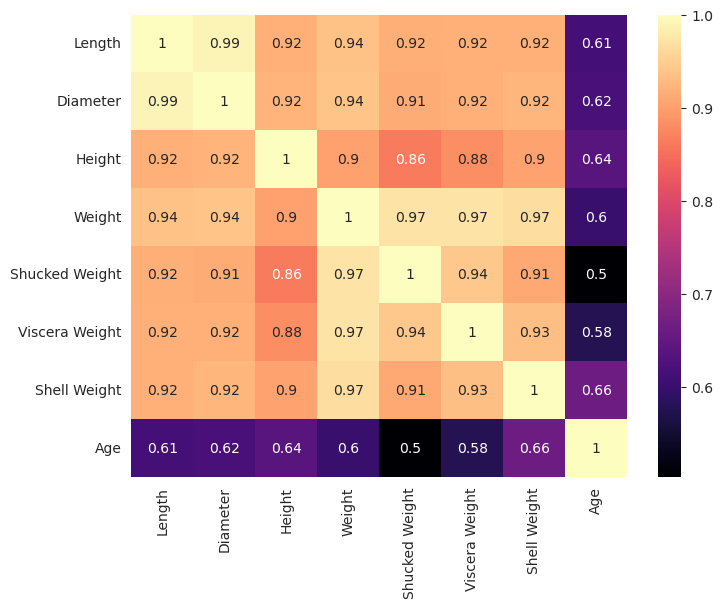

In [8]:
features = ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight','Viscera Weight', 'Shell Weight','Age']
corr = crab_train[features].corr()
plt.figure(figsize = (8,6))
sns.heatmap(corr, cmap = 'magma', annot = True);

# **FEATURE ENGINEERING**

In [9]:
# crab_train['Length'].replace(to_replace=0, method='ffill')
# crab_train['Height'].replace(to_replace=0, method='ffill')
# crab_train['Diameter'].replace(to_replace=0, method='ffill')

# crab_test['Length'].replace(to_replace=0, method='ffill')
# crab_test['Height'].replace(to_replace=0, method='ffill')
# crab_test['Diameter'].replace(to_replace=0, method='ffill')


# crab_train['Top Area'] = np.pi* crab_train['Length'] * crab_train['Diameter']
# # crab_train['Density'] = crab_train['Weight']/(crab_train['Top Area'] * crab_train['Height'])
# # crab_train["Length Diameter Ratio"]=crab_train['Length']/crab_train['Diameter']
# # crab_train["Length Height Ratio"]=crab_train['Length']/crab_train['Height']
# crab_train['Shell Shuck Ratio']=crab_train["Shell Weight"]/crab_train["Shucked Weight"]

# crab_test['Top Area'] = np.pi* crab_test['Length'] * crab_test['Diameter']
# # crab_test['Density'] = crab_test['Weight']/(crab_test['Top Area'] * crab_test['Height'])
# # crab_test["Length Diameter Ratio"]=crab_test['Length']/crab_test['Diameter']
# # crab_test["Length Height Ratio"]=crab_test['Length']/crab_test['Height']
# crab_test['Shell Shuck Ratio']=crab_test["Shell Weight"]/crab_test["Shucked Weight"]

# **Models**

In [10]:
crab_train.columns

Index(['id', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age', 'F', 'I', 'M'],
      dtype='object')

In [11]:
# X_train = crab_train[['id', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
#        'Viscera Weight', 'Shell Weight', 'F', 'I', 'M']]
# X_test = crab_test[['id', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
#        'Viscera Weight', 'Shell Weight', 'F', 'I', 'M']]
# y_train = crab_train.Age

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import datasets, ensemble
from catboost import CatBoostRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge

X_train, X_test, y_train, y_test = train_test_split(crab_train[['id', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
        'Viscera Weight', 'Shell Weight', 'F', 'I', 'M']], crab_train.Age, test_size=0.3,random_state=100)

In [13]:
rfmodel = RandomForestRegressor(max_depth= 12,min_samples_leaf= 10)
rfmodel.fit(X_train,y_train)

RandomForestRegressor(max_depth=12, min_samples_leaf=10)

In [14]:
brmodel = BayesianRidge(verbose=True,tol=0.0001,compute_score=True)
brmodel.fit(X_train,y_train)

Convergence after  4  iterations


BayesianRidge(compute_score=True, tol=0.0001, verbose=True)

In [15]:
gbmodel = GradientBoostingRegressor(max_depth= 8,loss='absolute_error',random_state=100)
gbmodel.fit(X_train, y_train)

GradientBoostingRegressor(loss='absolute_error', max_depth=8, random_state=100)

In [16]:
xgbmodel = xgb.XGBRegressor(max_depth= 8,random_state=100,learning_rate = 0.01,n_estimators= 1000 )
xgbmodel.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=100, ...)

In [17]:
catmodel = CatBoostRegressor(random_state=100, verbose=False)
catmodel.fit(X_train, y_train)

In [18]:
lgbmodel = LGBMRegressor(max_depth= 8,random_state=100)
lgbmodel.fit(X_train, y_train)

LGBMRegressor(max_depth=8, random_state=100)

In [19]:
vrmodel = VotingRegressor([('rf', rfmodel), ('gb', gbmodel),('xgb', xgbmodel),('cat',catmodel), ('lgb', lgbmodel)])
vrmodel.fit(X_train, y_train)

VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(max_depth=12,
                                                   min_samples_leaf=10)),
                            ('gb',
                             GradientBoostingRegressor(loss='absolute_error',
                                                       max_depth=8,
                                                       random_state=100)),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categoric...
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=8,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=1000, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=100, ...)),
                            ('cat',
                             <catboost.core.CatBoostRegressor object at 0x78c3d79a1ea0>),
                            ('lgb',
                             LGBMRegressor(max_depth=8, random_state=100))])

In [20]:
print(mean_absolute_error(y_test, rfmodel.predict(X_test)))
print(mean_absolute_error(y_test, brmodel.predict(X_test)))
print(mean_absolute_error(y_test, gbmodel.predict(X_test)))
print(mean_absolute_error(y_test, xgbmodel.predict(X_test)))
print(mean_absolute_error(y_test, catmodel.predict(X_test)))
print(mean_absolute_error(y_test, lgbmodel.predict(X_test)))
print(mean_absolute_error(y_test, vrmodel.predict(X_test)))

1.4096217295591749
1.486787784487542
1.3643412974593272
1.4079117361143592
1.4047328888876698
1.4041908360326925
1.3849740872704863


In [21]:
predictions = vrmodel.predict(crab_test)

In [22]:
crab_test['Age'] = predictions

In [23]:
crab_test.columns

Index(['id', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'F', 'I', 'M', 'Age'],
      dtype='object')

In [24]:
crab_test.drop(['F', 'I', 'M', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight'],axis = 1,inplace = True)

In [25]:
crab_test.head()

,id,Age
0,74051,7.709117
1,74052,7.760742
2,74053,10.131306
3,74054,9.678642
4,74055,7.356475


In [26]:
crab_test.to_csv('submissionvr.csv',header=True,index=False)